# Demo of 2019-nCov Data Analysis

The novel coronavirus (2019-nCov) has recently swept through China and triggered a global health emergency.  In order to better assess the situation, we need to analyze the epidemic data.  Many websites have been publishing this in real time, for example, [Ding Xiang Yuan](https://ncov.dxy.cn/ncovh5/view/pneumonia), [Tencent](https://news.qq.com/zt2020/page/feiyan.htm), [John Hopkins](https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6), etc.  These websites provides timely information for the general public, but they fall short of providing sufficient data for analysis.  For example, answering any of the following simple questions will be very difficult or impossible by using the websites mentioned above:

* What is the number of confirmed cases in the past 10 days in the Hubei Province ?
* How do the daily new confirmed cases compare between the provinces of Guangdong and Zhejiang ?
* Which city have the second highest fatality rates ?  
* (And much more ...)

In order to be able to analyze the data, a better and more convenient data set is necessary.  The [DXY-2019-nCoV-Data](https://github.com/BlankerL/DXY-2019-nCoV-Data) GitHub project  constantly snaps the real time epidemic report from  [Ding Xiang Yuan](https://ncov.dxy.cn/ncovh5/view/pneumonia), and saves it into a CSV file.  However, this CSV file is still inconvenient for general users, because different cities reports at different times, and the reporting format changes from time to time.

Therefore, this project [nCov2019_analysis](https://github.com/jianxu305/nCov2019_analysis) is created.  Its main purpose are the following:

1. Performs essential data cleanings
2. Provides a convenient structured data for users to explore
3. Using this data set, analyze some aspects of this epidemic

Following is a demo of the basic usage:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import utils   # some convenient functions

%load_ext autoreload
%autoreload 2

## 1. Obtain Raw CSV Data 

In [3]:
data = utils.load_chinese_data()

Last update:  2020-02-13 06:55:35.291000
Data date range:  2020-01-24 to 2020-02-13
Number of rows in raw data:  35330


In [4]:
data.head(3)  # Check the data

,province_name,city_name,province_confirmed,province_suspected,province_cured,province_dead,city_confirmed,city_suspected,city_cured,city_dead,update_time,update_date
0,山西省,晋中,126,0,33,0,35,0,8,0,2020-02-13 06:55:35.291,2020-02-13
1,山西省,运城,126,0,33,0,19,0,8,0,2020-02-13 06:55:35.291,2020-02-13
2,山西省,太原,126,0,33,0,18,0,3,0,2020-02-13 06:55:35.291,2020-02-13


## 2. Data Processing
This step does the the following:
* Aggregate the raw CSV data into daily data
* Perform basic cleaning due to inconsistent reporting schemes.  For example, the same city may appear as different names at different reporting time, etc
* Added daily new confirmed / cured / dead numbers
* Added *_en* columns for *province_name* and *city_name* so that non-Chinese users can easily use the dataset 

The resulting dataset is a flat Pandas data frame, logically indexed by (update_date, province_name(_en), city_name(_en)), so users can easily slice the data in whatever way they want, or export to other applications.

In [27]:
daily_frm = utils.aggDaily(data)

In [28]:
daily_frm.tail(3)

,update_date,province_name,province_name_en,city_name,city_name_en,cum_confirmed,cum_cured,cum_dead,new_confirmed,new_cured,new_dead,update_time
233,2020-02-13,黑龙江省,Helongjiang,鹤岗,Hegang,5,1,0,0.0,0.0,0.0,2020-02-13 00:19:12.057
232,2020-02-13,黑龙江省,Helongjiang,黑河,Heihe,6,0,0,0.0,0.0,0.0,2020-02-13 00:19:12.057
227,2020-02-13,黑龙江省,Helongjiang,齐齐哈尔,Qiqihaer,33,4,1,0.0,0.0,0.0,2020-02-13 00:19:12.057


## 3. Data Exploration Examples

### 3.1 Slicing Data

#### Selecting a province by its English (Pinyin) name

In [7]:
daily_frm[daily_frm['province_name_en'] == 'Guangdong'].head()

,update_date,province_name,province_name_en,city_name,city_name_en,cum_confirmed,cum_cured,cum_dead,new_confirmed,new_cured,new_dead,update_time
34351,2020-01-24,广东省,Guangdong,中山,Zhongshan,2,0,0,NaN,NaN,NaN,2020-01-24 23:35:03.158
34345,2020-01-24,广东省,Guangdong,佛山,Foshan,7,0,0,NaN,NaN,NaN,2020-01-24 23:35:03.158
34346,2020-01-24,广东省,Guangdong,广州,Guangzhou,7,0,0,NaN,NaN,NaN,2020-01-24 23:35:03.158
34347,2020-01-24,广东省,Guangdong,惠州,Huizhou,5,0,0,NaN,NaN,NaN,2020-01-24 23:35:03.158
34343,2020-01-24,广东省,Guangdong,深圳,Shenzhen,15,2,0,NaN,NaN,NaN,2020-01-24 23:35:03.158


#### Selecting a city by its Chinese name

In [8]:
daily_frm[daily_frm['city_name'] == '武汉'].head()

,update_date,province_name,province_name_en,city_name,city_name_en,cum_confirmed,cum_cured,cum_dead,new_confirmed,new_cured,new_dead,update_time
34542,2020-01-24,湖北省,Hubei,武汉,Wuhan,495,31,23,NaN,NaN,NaN,2020-01-24 17:30:09.978
33367,2020-01-25,湖北省,Hubei,武汉,Wuhan,572,32,38,77.0,1.0,15.0,2020-01-25 23:55:35.775
32718,2020-01-26,湖北省,Hubei,武汉,Wuhan,618,40,45,46.0,8.0,7.0,2020-01-26 13:50:35.848
31539,2020-01-27,湖北省,Hubei,武汉,Wuhan,698,42,63,80.0,2.0,18.0,2020-01-27 16:42:57.343
30735,2020-01-28,湖北省,Hubei,武汉,Wuhan,1590,47,85,892.0,5.0,22.0,2020-01-28 16:36:17.441


#### Selecting a date

In [9]:
daily_frm[daily_frm['update_date'] == pd.to_datetime('2020-01-27')].head()

,update_date,province_name,province_name_en,city_name,city_name_en,cum_confirmed,cum_cured,cum_dead,new_confirmed,new_cured,new_dead,update_time
31576,2020-01-27,上海市,Shanghai,嘉定区,Jiadingqu,1,0,0,NaN,NaN,NaN,2020-01-27 15:56:40.534
31566,2020-01-27,上海市,Shanghai,外地来沪人员,Non_Residence,23,3,0,NaN,NaN,NaN,2020-01-27 15:56:40.534
31577,2020-01-27,上海市,Shanghai,奉贤区,Fengxian,1,0,0,NaN,NaN,NaN,2020-01-27 15:56:40.534
31575,2020-01-27,上海市,Shanghai,宝山区,Baoshanqu,1,0,0,NaN,NaN,NaN,2020-01-27 15:56:40.534
31570,2020-01-27,上海市,Shanghai,徐汇区,Xuhuiqu,3,0,0,NaN,NaN,NaN,2020-01-27 15:56:40.534


### 3.2 Plotting
Two convenience plotting functions are provided for basic analysis
* Time series plot: *utils.tsplot_conf_dead_cured()* 
* Cross-sectional plot: *utils.cross_sectional_bar()*

#### Time series plot examples:

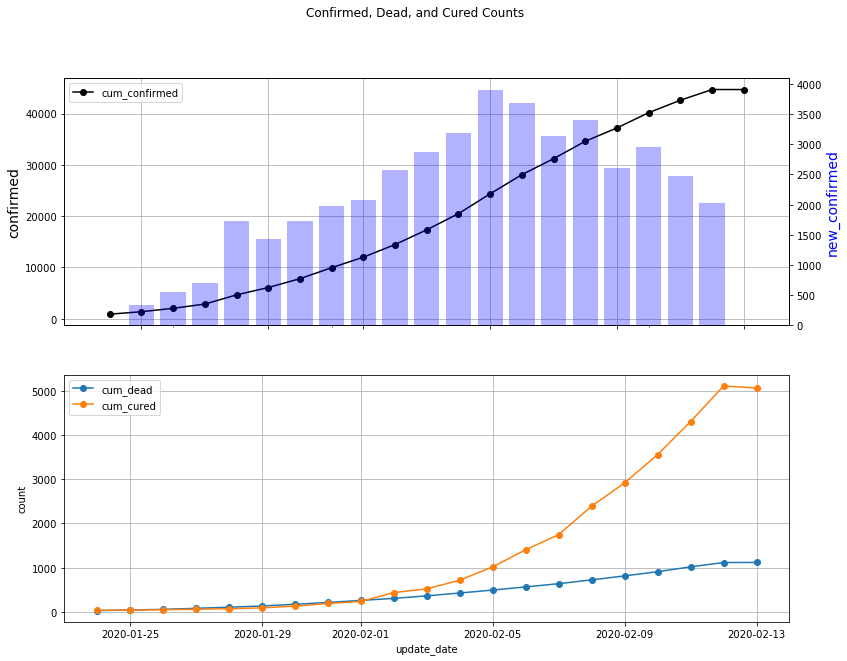

In [10]:
fig = utils.tsplot_conf_dead_cured(daily_frm)
fig.suptitle('Confirmed, Dead, and Cured Counts')
plt.show()

#### It's easy to do the same time series plot for a given province

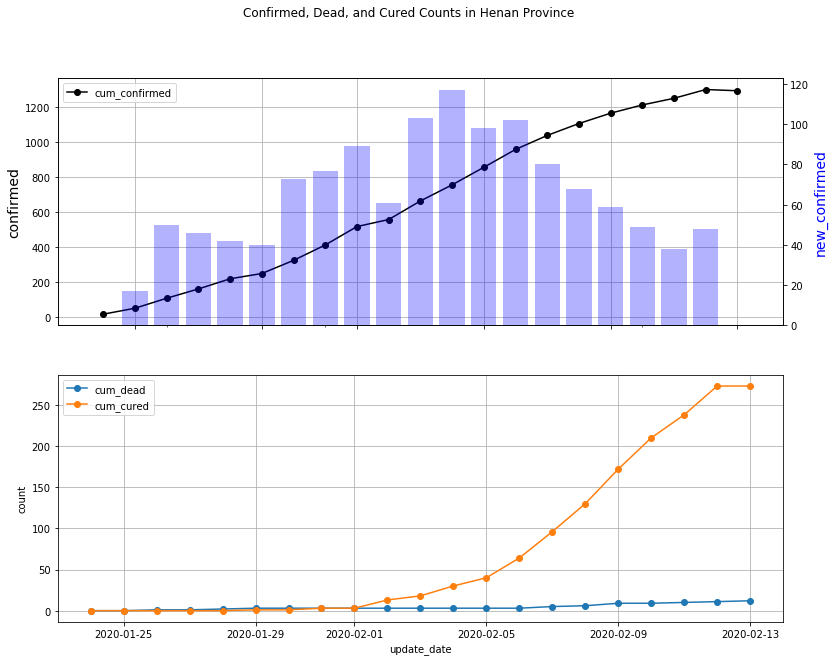

In [13]:
province = 'Henan'   
fig = utils.tsplot_conf_dead_cured(daily_frm[daily_frm['province_name_en'] == province])
fig.suptitle('Confirmed, Dead, and Cured Counts in ' + province + ' Province')
plt.show()                                  

#### The same thing can be done for a given city.  And you can also use *logy=True* to plot in log scale

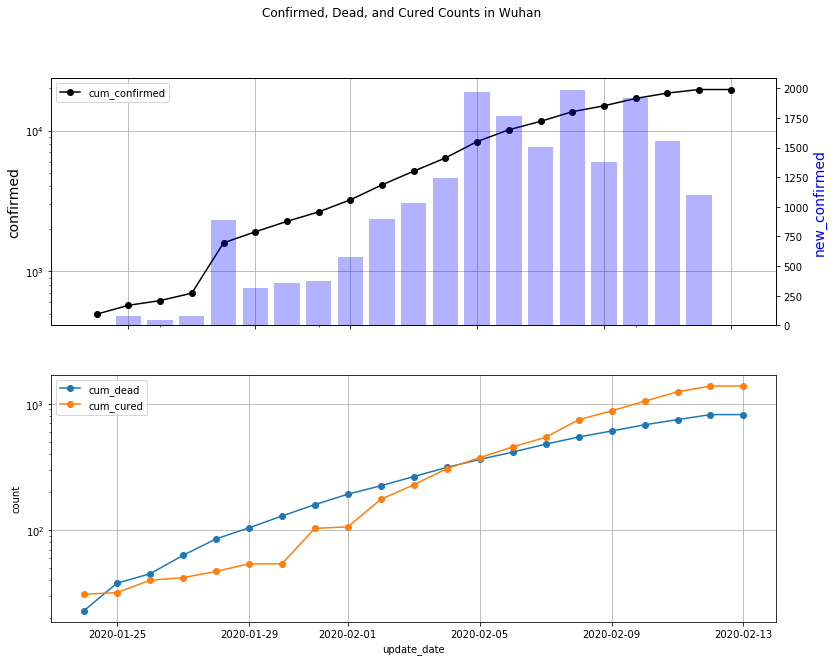

In [14]:
fig = utils.tsplot_conf_dead_cured(daily_frm[daily_frm['city_name_en'] == 'Wuhan'], logy=True)
fig.suptitle('Confirmed, Dead, and Cured Counts in Wuhan')
plt.show()  

#### Cross-sectional plot examples:

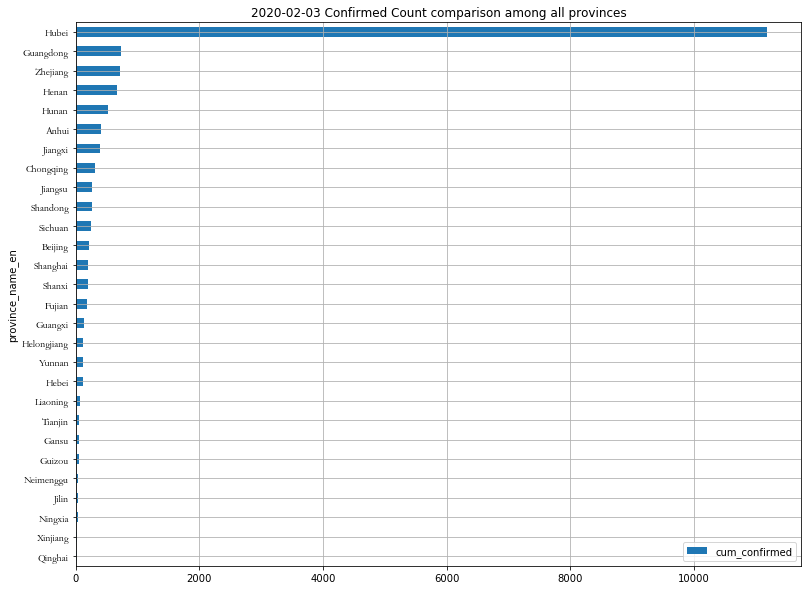

In [19]:
ax = utils.cross_sectional_bar(daily_frm, '2020-02-03', col='cum_confirmed', groupby='province_name_en')
ax.set_title('2020-02-03 Confirmed Count comparison among all provinces')
plt.show()

#### Use the *largestN* parameter to show only the top N bars

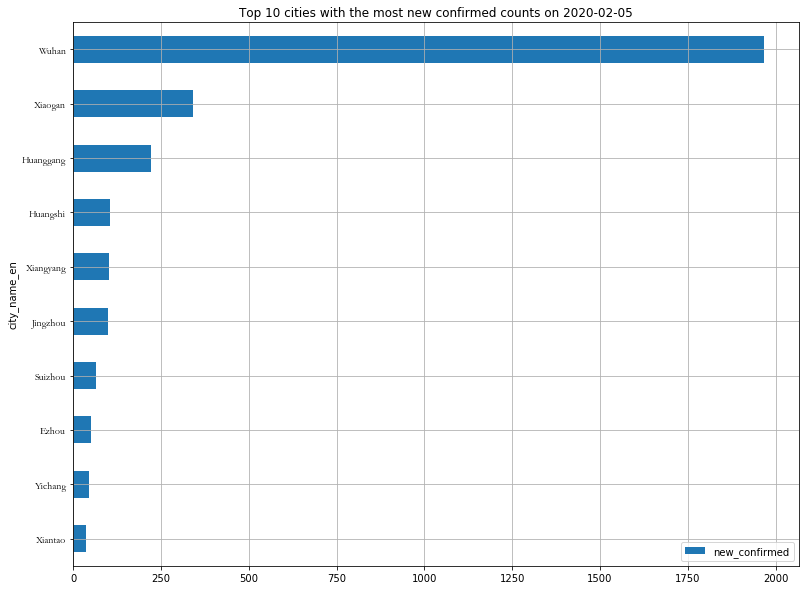

In [23]:
ax = utils.cross_sectional_bar(daily_frm, '2020-02-05', col='new_confirmed', groupby='city_name_en', largestN=10)
ax.set_title('Top 10 cities with the most new confirmed counts on 2020-02-05' )
plt.show()